<a href="https://colab.research.google.com/github/cartman12/DS-Unit-2-Regression-1/blob/master/Mohamad%20Ali%20Nasser%20-%20DS_Sprint_Challenge_6_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [0]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)

### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



In [10]:
avocado.tail()

,ds,y
164,2018-02-25,109231389
165,2018-03-04,111844876
166,2018-03-11,111465145
167,2018-03-18,113673928
168,2018-03-25,118268903


In [0]:
avocado = avocado.rename(columns={'Date' : 'ds', 'Total Volume' : 'y'}) #Renaming

In [0]:
from fbprophet import Prophet

In [11]:
#Fitting the Prophet model
m = Prophet()
m.fit(avocado)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods = 730)
forcast = m.predict(future)

In [118]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (Observed),Independence Day (Observed)_lower,Independence Day (Observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,"Martin Luther King, Jr. Day","Martin Luther King, Jr. Day_lower","Martin Luther King, Jr. Day_upper",Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (Observed),Veterans Day (Observed)_lower,Veterans Day (Observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
894,2020-03-20,1.726210e+08,1.461547e+08,2.043992e+08,1.488741e+08,1.997257e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.366313e+06,1.366313e+06,1.366313e+06,0.0,0.0,0.0,1.366313e+06,1.366313e+06,1.366313e+06,0.0,0.0,0.0,1.739874e+08
895,2020-03-21,1.727090e+08,1.465660e+08,2.029633e+08,1.489235e+08,1.998645e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.300963e+06,1.300963e+06,1.300963e+06,0.0,0.0,0.0,1.300963e+06,1.300963e+06,1.300963e+06,0.0,0.0,0.0,1.740100e+08
896,2020-03-22,1.727970e+08,1.469723e+08,2.048673e+08,1.489385e+08,2.000034e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.267365e+06,1.267365e+06,1.267365e+06,0.0,0.0,0.0,1.267365e+06,1.267365e+06,1.267365e+06,0.0,0.0,0.0,1.740643e+08
897,2020-03-23,1.728849e+08,1.465304e+08,2.047937e+08,1.489345e+08,2.001422e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.265563e+06,1.265563e+06,1.265563e+06,0.0,0.0,0.0,1.265563e+06,1.265563e+06,1.265563e+06,0.0,0.0,0.0,1.741505e+08
898,2020-03-24,1.729729e+08,1.468715e+08,2.043817e+08,1.489512e+08,2.002810e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.295481e+06,1.295481e+06,1.295481e+06,0.0,0.0,0.0,1.295481e+06,1.295481e+06,1.295481e+06,0.0,0.0,0.0,1.742684e+08


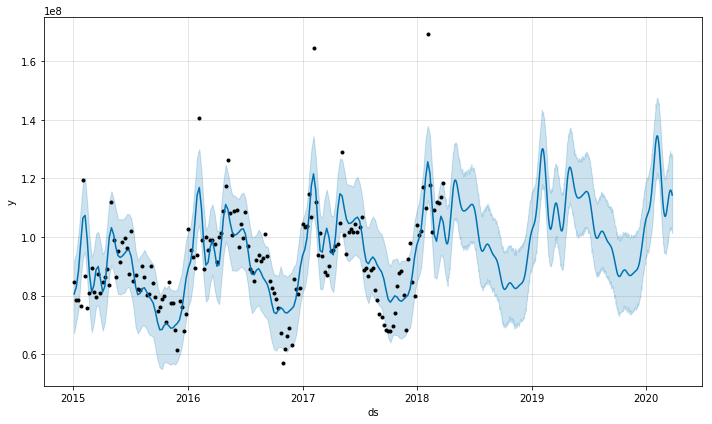

In [19]:
fig = m.plot(forcast)

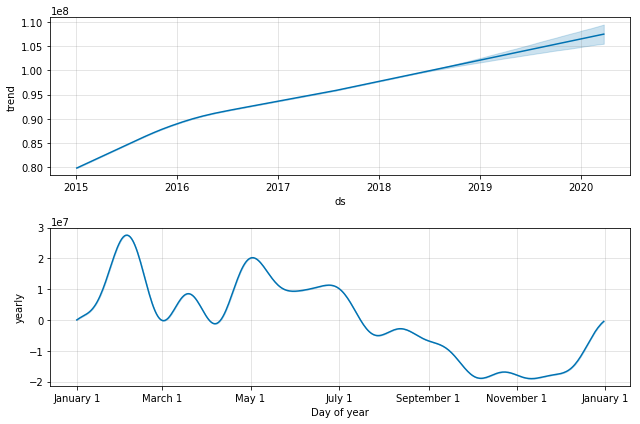

In [20]:
# Plotting the components
fig1 = m.plot_components(forcast)

In [21]:
from fbprophet.diagnostics import cross_validation
avocado_cv = cross_validation(m, 
                         horizon='90 days', period='45 days', initial='730 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


In [23]:
from fbprophet.diagnostics import performance_metrics
performance_metrics(avocado_cv).tail()

,horizon,mse,rmse,mae,mape,coverage
77,86 days,4.382687e+14,2.093487e+07,1.481539e+07,0.136019,0.6
78,87 days,4.353030e+14,2.086392e+07,1.464509e+07,0.132272,0.6
79,88 days,4.621349e+14,2.149732e+07,1.608344e+07,0.154498,0.5
80,89 days,4.604971e+14,2.145920e+07,1.585167e+07,0.152976,0.5
81,90 days,4.878952e+14,2.208835e+07,1.674935e+07,0.148295,0.4


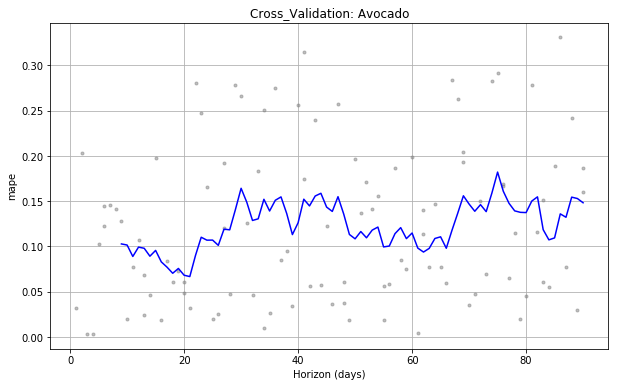

In [109]:
# Cross validation
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(avocado_cv, metric='mape')
plt.title('Cross_Validation: Avocado');


### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

In [0]:
forcast[forcast['ds'] < avocado['ds'].iloc[-1]]['yhat']

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


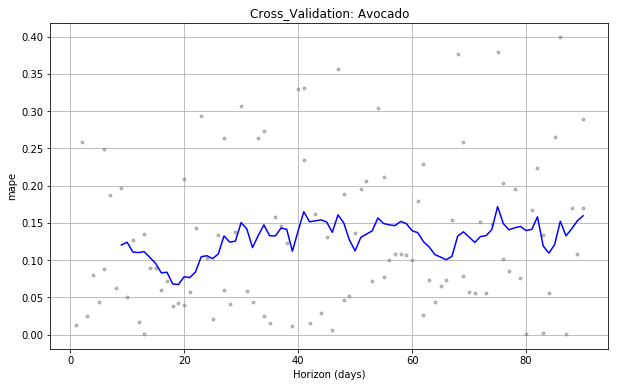

In [117]:
m = Prophet(changepoint_prior_scale=0.5,yearly_seasonality=4) # changepoints and fourrier order

m.add_country_holidays(country_name='US') # specifiying US holiday


m.fit(avocado)
future = m.make_future_dataframe(periods = 730)
forcast = m.predict(future)
avocado_cv = cross_validation(m, 
                         horizon='90 days', period='45 days', initial='730 days')
fig = plot_cross_validation_metric(avocado_cv, metric='mape')
plt.title('Cross_Validation: Avocado');

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [0]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

In [0]:
rent

In [0]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score


In [0]:
rent['Mean Baseline'] = rent['price'].mean()

In [75]:
MEA_mean = mean_absolute_error(rent['price'], rent['Mean Baseline'])
r2 = r2_score(rent['price'], rent['Mean Baseline'])
print('Mean Absolute Error:', MEA_mean)
print('R^2:', r2)


Mean Absolute Error: 1055.7857771080928
R^2: 0.0


In [0]:
# Split data based on month
train = rent.query('month != 6')
test  = rent.query('month == 6')

In [71]:
train.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price,Mean Baseline
2,2016,4,1,1.0,40.7388,-74.0018,2850,3438.052034
3,2016,4,1,1.0,40.7539,-73.9677,3275,3438.052034
4,2016,4,4,1.0,40.8241,-73.9493,3350,3438.052034
5,2016,4,4,2.0,40.7429,-74.0028,7995,3438.052034
6,2016,4,2,1.0,40.8012,-73.9660,3600,3438.052034


In [0]:
# Fitting the data for the whole data before spliting
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['bedrooms','longitude']
target = 'price'

X = rent[features]
y = rent[target]
model.fit(X, y)
y_pred = model.predict(X)

In [102]:
MEA_reg = mean_absolute_error(y, y_pred)
r2_reg = r2_score(y, y_pred)
print('Mean Absolute Error for regression:', MEA_reg)
print('R^2 for regression:', r2_reg)

Mean Absolute Error for regression: 756.0310270560997
R^2 for regression: 0.4287212733959611


In [103]:
# printing model intercept and coefficient Beta on the whole data
print('Intercept:', model.intercept_)
print('Coefficients 1:',  model.coef_[0],'Coefficients 2:',model.coef_[1])

Intercept: -1194245.0150382624
Coefficients 1: 737.572046733142 Coefficients 2: -16175.912184278515


In [104]:
# Fitting the model on train data and checking MAE and R2 on the test data

X_train = train[features] 
y_train = train[target]
X_test  = test[features]
y_test  = test[target]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MEA_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print('Mean Absolute Error for regression:', MEA_test)
print('R^2 for regression:', r2_test)

Mean Absolute Error for regression: 767.873838790542
R^2 for regression: 0.4094592610785772


In [105]:
# printing the test model intercept and coefficient Beta
print('Intercept:', model.intercept_)
print('Coefficients 1:',  model.coef_[0],'Coefficients 2:',model.coef_[1])

Intercept: -1194759.750120282
Coefficients 1: 745.4390525550562 Coefficients 2: -16182.696334295124


### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
features = ['bedrooms','bathrooms','latitude','longitude']
target = 'price'

In [107]:

X_train = train[features] 
y_train = train[target]
X_test  = test[features]
y_test  = test[target]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MEA_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
RMSE = sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error for regression:', MEA_test)
print('R^2 for regression:', r2_test)
print('RMSE regression:', RMSE)

Mean Absolute Error for regression: 667.6543093383528
R^2 for regression: 0.5637948359714793
RMSE regression: 928.5485606974506
